In [155]:
#IMPORT MODULES
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
#READ IN AND VIEW DATASET
df = pd.read_csv(r"C:\Users\USER\Desktop\nkay_ds\titanic3.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [157]:
#CHECK DATA COLUMNS
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [158]:
len(df.columns), len(df.index)

(14, 1309)

In [159]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [160]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [161]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [162]:
df.duplicated().value_counts()

False    1309
dtype: int64

In [163]:
df.drop_duplicates()
df.duplicated().value_counts()

False    1309
dtype: int64

In [164]:
df2 = df.drop(["boat", "body", "home.dest", "cabin", "ticket", "name"],axis=1)

In [165]:
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


In [166]:
df2.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [167]:
df2["sex"].value_counts(), df2["embarked"].value_counts()

(male      843
 female    466
 Name: sex, dtype: int64,
 S    914
 C    270
 Q    123
 Name: embarked, dtype: int64)

In [168]:
df2["age"].fillna(df2["age"].mean(), inplace = True)
df2["fare"].fillna(df2["fare"].mean(), inplace = True)
df2["embarked"].fillna(value = "missing", inplace=True)
df2.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [169]:
df2["sex"] = df2["sex"].replace(["male"], 1)
df2["sex"] = df2["sex"].replace(["female"], 0)

df2["embarked"] = df2["sex"].replace(["S"], 0)
df2["embarked"] = df2["sex"].replace(["C"], 1)
df2["embarked"] = df2["sex"].replace(["Q"], 2)

df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,0
1,1,1,1,0.92,1,2,151.5500,1
2,1,0,0,2.00,1,2,151.5500,0
3,1,0,1,30.00,1,2,151.5500,1
4,1,0,0,25.00,1,2,151.5500,0


In [170]:
df2.dtypes

pclass        int64
survived      int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

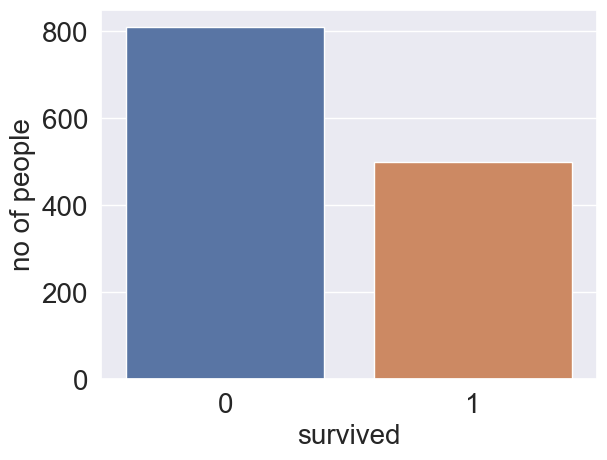

In [194]:
sns.countplot(data=df2, x="survived")
plt.xlabel(xlabel="survived", fontsize=20)
plt.ylabel(ylabel="no of people", fontsize=20)
plt.tick_params(labelsize=20);

In [171]:
df2.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.050198
sibsp,0.027825
parch,0.082660
fare,0.244208
embarked,0.528693


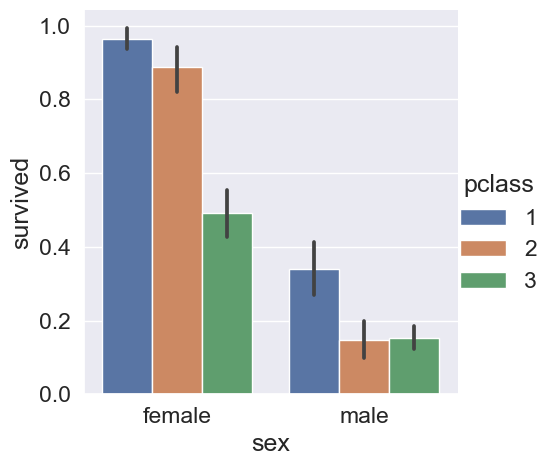

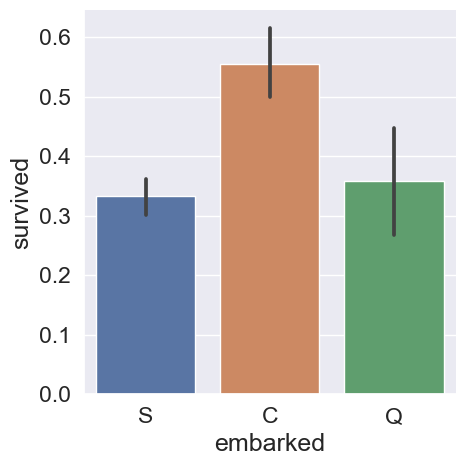

In [172]:
from turtle import color

sns.catplot(kind = "bar", x = "sex", y = "survived", hue = "pclass", data = df)
sns.catplot(kind = "bar", x = "embarked", y = "survived", data = df)

In [173]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_preds (y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score (y_test, y_preds)
    f1 = f1_score (y_test, y_preds)

    metric_dict = {
                    "accuracy": round(accuracy, 2),
                    "precision": round(precision,2),
                    "recall": round(recall,2),
                    "f1": round(f1,2)
                    }

    print(f"Accuracy: {accuracy*100:.2f}%")
    print (f"Precision: {precision:.2f}")
    print (f"Recall: {recall:.2f}")
    print (f"F1: {f1:.2f}")

    return metric_dict


Accuracy: 78.24%
Precision: 0.77
Recall: 0.69
F1: 0.73


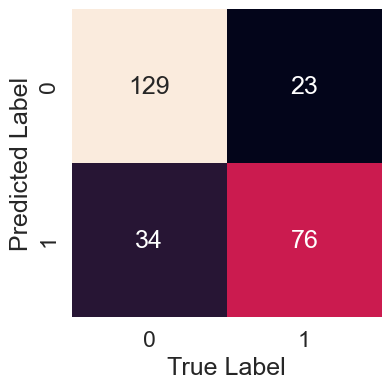

In [174]:
X = df2.drop("survived", axis =1)
y = df2["survived"]

from sklearn.model_selection import train_test_split
np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



from sklearn.preprocessing import StandardScaler
np.random.seed(7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
np.random.seed(7)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)
metrics = evaluate_preds(y_test, y_preds)

def plot_conf_matrix (conf_mat):
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(
                    conf_mat,
                    annot = True,
                    cbar = False,
                    fmt= '.3g'
                    )
    plt.xlabel ("True Label")
    plt.ylabel ("Predicted Label")

    return


from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_matrix(conf_mat)

In [175]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


np.random.seed(7)
df2_shuffled = df2.sample(frac =1)
df2_shuffled.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
1237,3,0,1,24.000000,0,0,7.7958,1
1072,3,0,1,29.881138,0,0,7.7333,1
454,2,1,1,42.000000,0,0,13.0000,1
363,2,0,1,29.881138,0,0,0.0000,1
1017,3,1,1,21.000000,0,0,7.7750,1


In [176]:
X = df2_shuffled.drop("survived", axis = 1)
y = df2_shuffled["survived"]

train_split = round(0.7* len(df2_shuffled))
valid_split = round(train_split + 0.15 *len(df2_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split: valid_split], y[train_split: valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test), len(y_train), len(y_valid), len(y_test), X.shape, y.shape

(916, 196, 197, 916, 196, 197, (1309, 7), (1309,))

In [177]:
from sklearn.preprocessing import StandardScaler
np.random.seed(7)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

X_train.shape, X_valid.shape, X_test.shape

((916, 7), (196, 7), (197, 7))

In [178]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(7)
model_frac = RandomForestClassifier()
model_frac.fit(X_train, y_train)

y_preds = model_frac.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics


Accuracy: 74.49%
Precision: 0.69
Recall: 0.65
F1: 0.67


{'accuracy': 0.74, 'precision': 0.69, 'recall': 0.65, 'f1': 0.67}

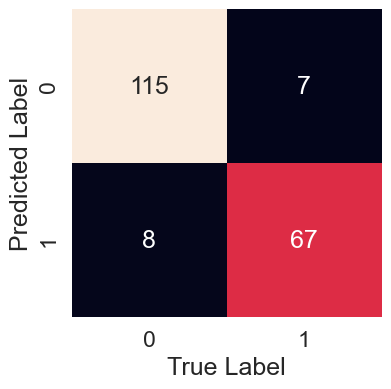

In [179]:
def plot_conf_matrix (conf_mat):
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(
                    conf_mat,
                    annot = True,
                    cbar = False,
                    fmt= '.3g'
                    )
    plt.xlabel ("True Label")
    plt.ylabel ("Predicted Label")

    return

y_preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_matrix(conf_mat)

In [180]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
        "n_estimators": [10, 100,200,500,1000,1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4]
        }

np.random.seed(7)
rs_model = RandomizedSearchCV(estimator = model,
                                param_distributions = grid,
                                n_iter = 10,
                                cv = 5,
                                verbose = 2)
rs_model.fit(X_train, y_train)
rs_model.best_params_

rs_y_preds = rs_model.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total 

In [181]:
from sklearn.model_selection import GridSearchCV

grid_2 = {
        "n_estimators": [200,500],
        "max_depth": [5, 10],
        "max_features": ["sqrt"],
        "min_samples_split": [4,6],
        "min_samples_leaf": [2,4]
        }

np.random.seed(7)
gs_model = GridSearchCV (estimator = model,
                    param_grid = grid_2,
                    cv = 5,
                    verbose = 2)
                    
gs_model.fit(X_train, y_train)
gs_y_preds = gs_model.predict(X_test)
gs_metrics = evaluate_preds(y_test, gs_y_preds)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total 

<AxesSubplot:>

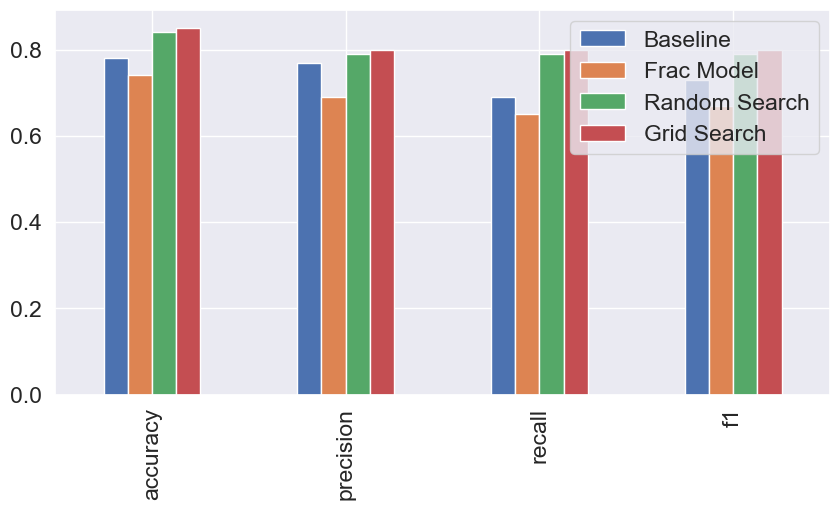

In [189]:
compare_metrics = pd.DataFrame(
    {"Baseline": metrics,
    "Frac Model": baseline_metrics,
    "Random Search": rs_metrics,
    "Grid Search": gs_metrics}
    )

compare_metrics.plot.bar(figsize = (10,5))

